# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [72]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

Rho = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in Rho:
    ts1 = ts(rho=0.5)
    result = adfuller(ts1)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value));



ADF Statistic: -8.007470
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -9.358964
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -7.631462
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -8.208590
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -4.019212
p-value: 0.001313
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
ADF Statistic: -8.275923
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -5.899526
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -5.403856
p-value: 0.000003
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -6.914759
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


# 02.2 Download and explore one series from google trends

C:\Users\samora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Text(0.5, 0, 'time')

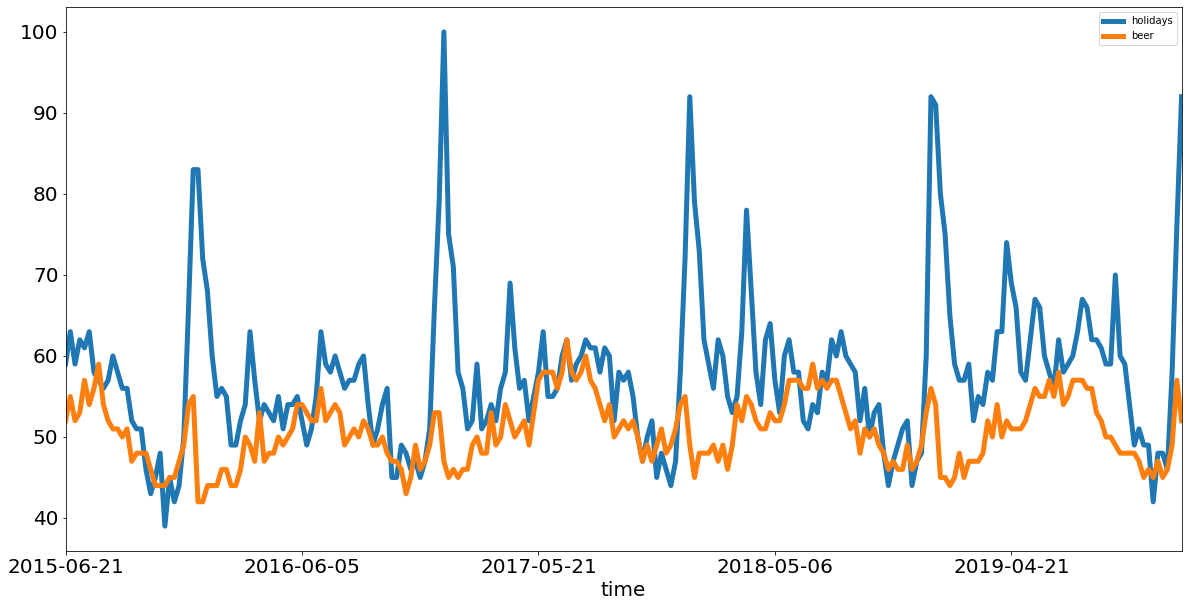

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


df = pd.read_csv("multiTimelineV2.csv", skiprows=1)
df.columns = ['time', 'holidays', 'beer']
df.head()


df.month = pd.to_datetime(df.time)
df.set_index('time', inplace=True)

df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20)


In [64]:
df.corr()

,holidays,beer
holidays,1.000000,0.275266
beer,0.275266,1.000000


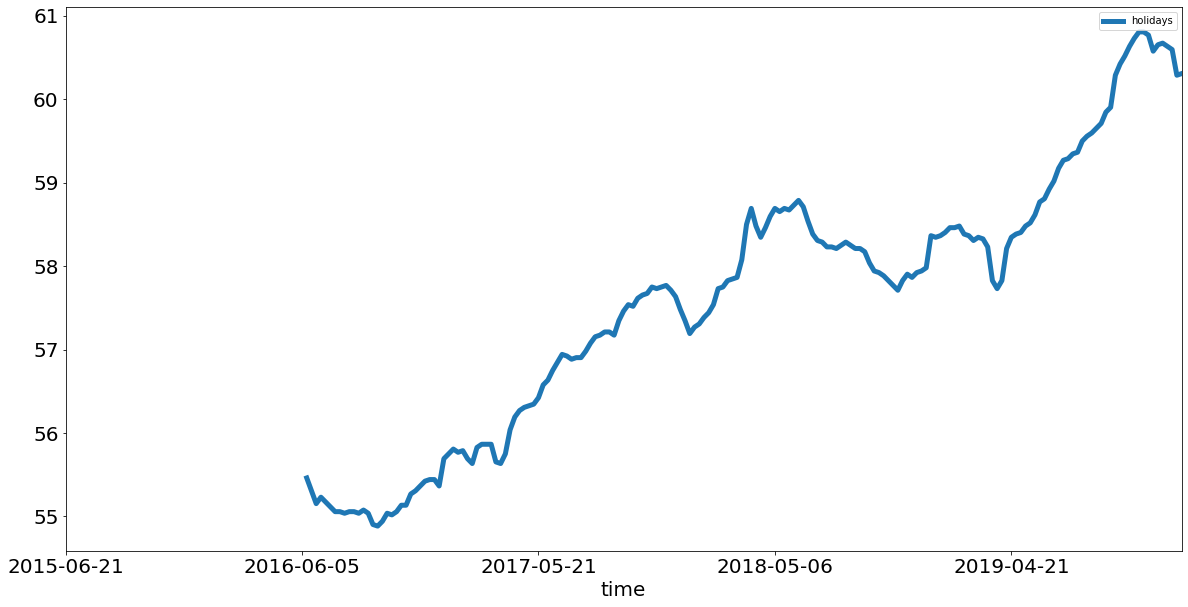

In [52]:
diet = df[['holidays']]
diet.rolling(52).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20);

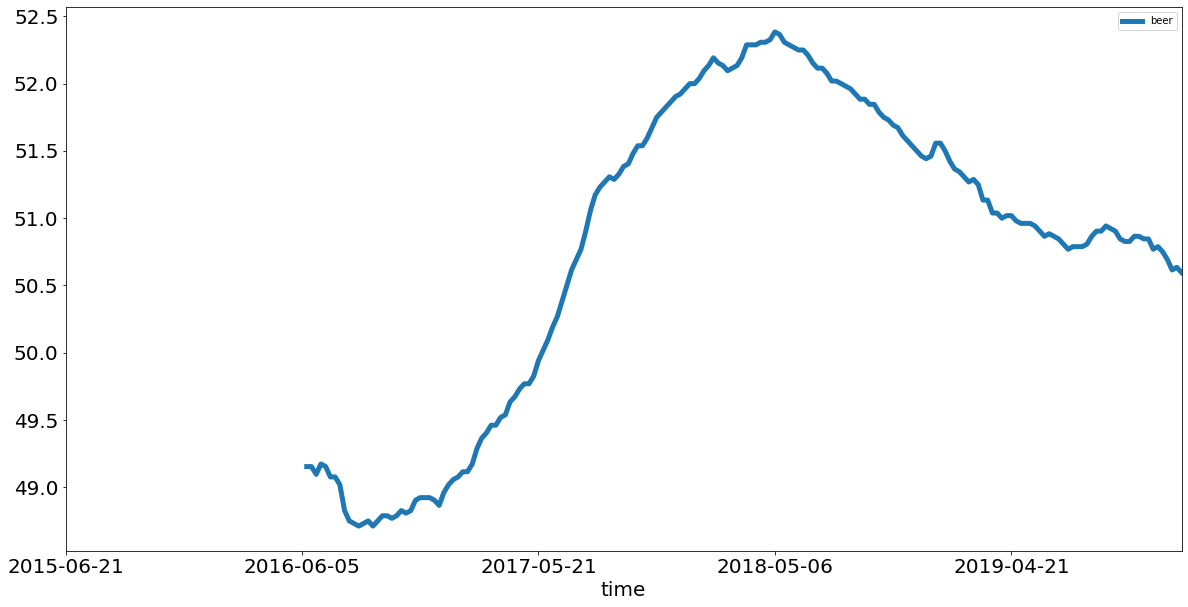

In [53]:
diet = df[['beer']]
diet.rolling(52).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20);

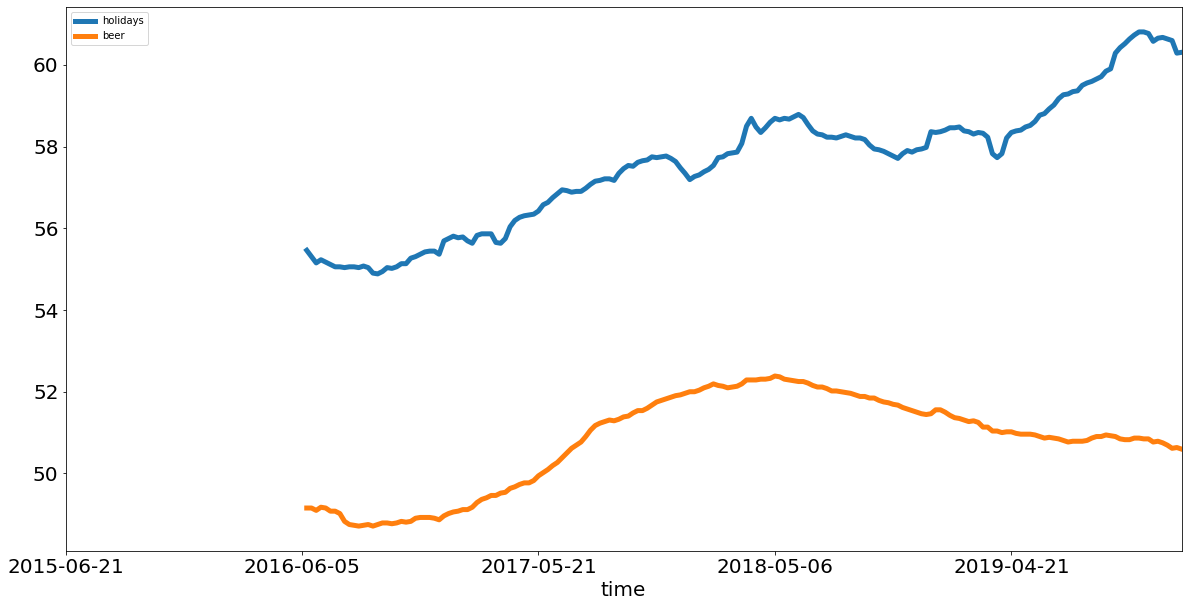

In [56]:
df[['holidays', 'beer']].rolling(52).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20);

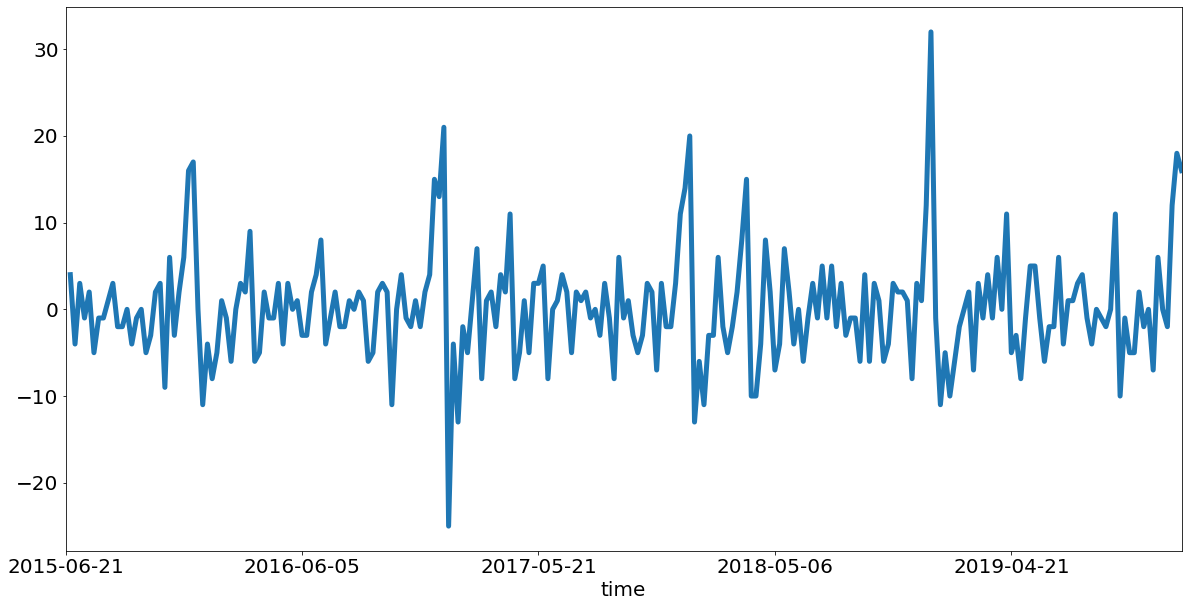

In [58]:
df['holidays'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20);

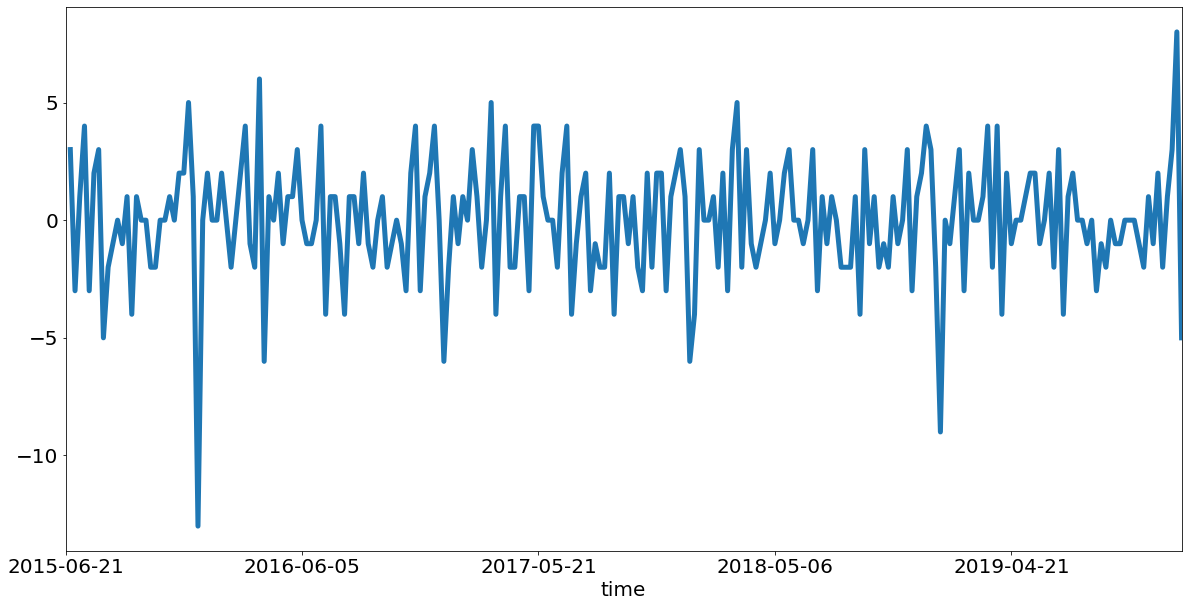

In [59]:
df['beer'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20);

In [60]:
result = adfuller(df['holidays'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.101950
p-value: 0.000000
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


In [61]:
result = adfuller(df['beer'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.938875
p-value: 0.000029
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


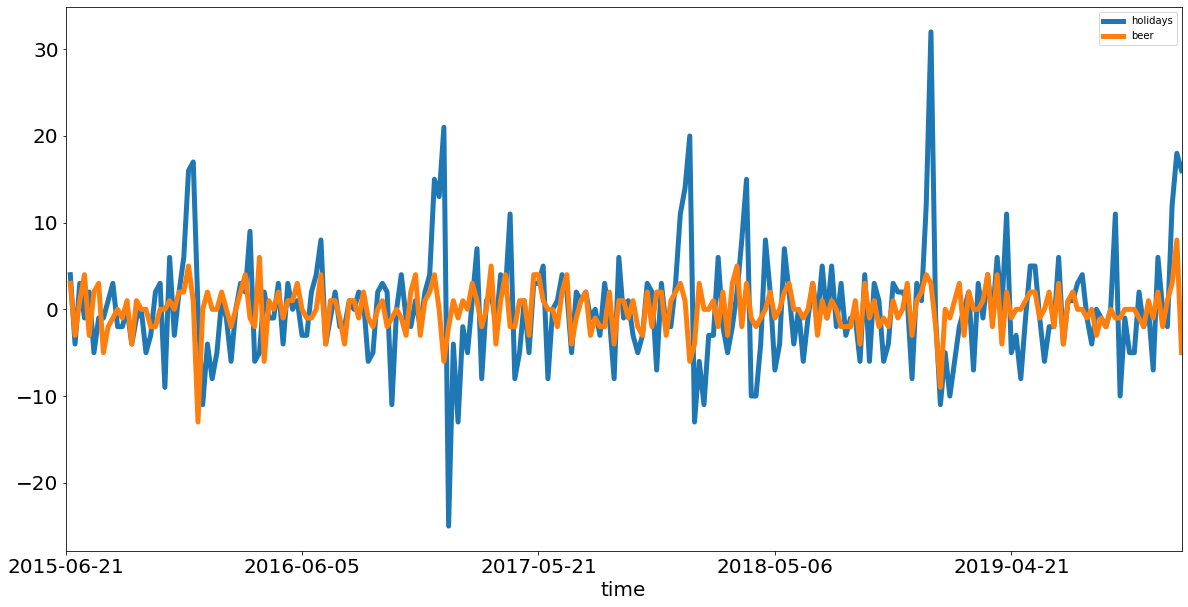

In [62]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20);

In [63]:
df.diff().corr()

,holidays,beer
holidays,1.000000,0.288351
beer,0.288351,1.000000


In [73]:
df.diff(2).corr()

,holidays,beer
holidays,1.000000,0.324249
beer,0.324249,1.000000


In [74]:
df.diff(3).corr()

,holidays,beer
holidays,1.000000,0.345768
beer,0.345768,1.000000


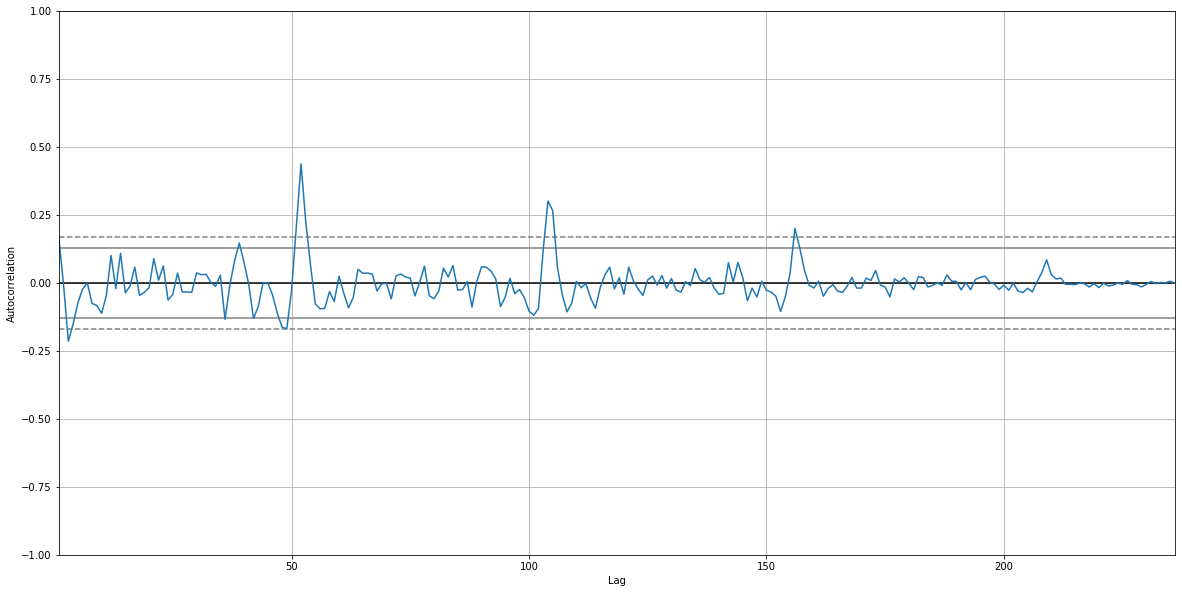

In [3]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df['holidays'].diff().iloc[1:]);

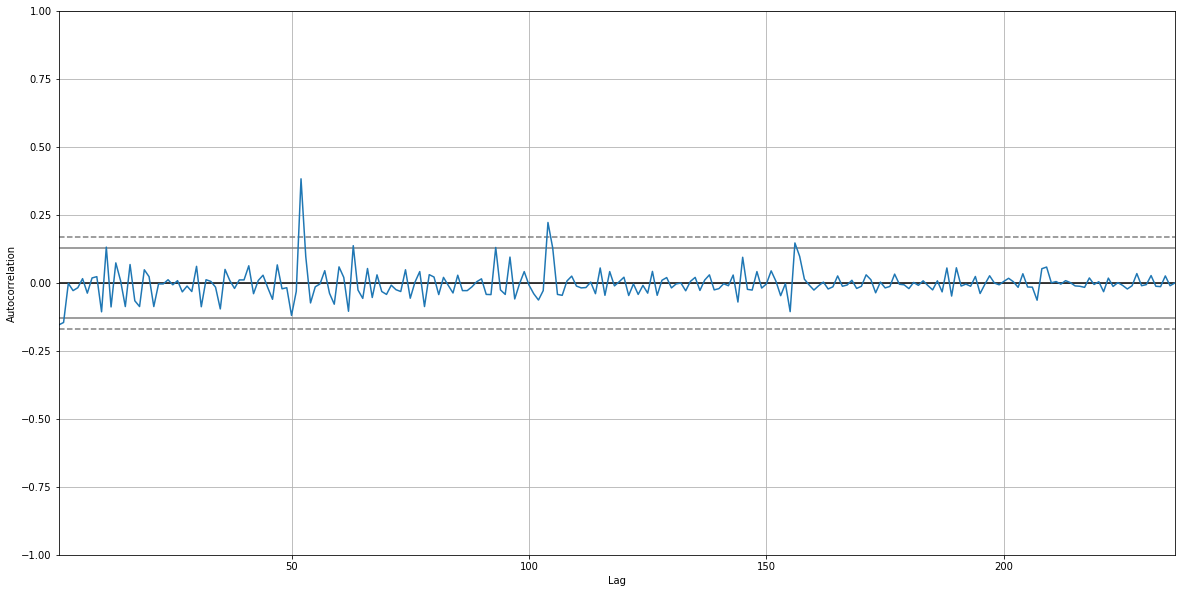

In [4]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df['beer'].diff().iloc[1:]);